# Tutorial de solución de ecuaciones diferenciales ordinarias con forzamiento temporal estocástico
### Lourdes Martín Aguilar, César Flores López & Marco Herrera Valdez 
#### Facultad de Ciencias, Universidad Nacional Autónoma de México

Importamos los módulos necesarios

In [35]:
import scipy as sc
import matplotlib.pylab as gr 
from scipy.integrate import odeint 
%matplotlib inline 


Definimos un diccionario

In [36]:
p=dict() 
p={"a":1.0, "tau":1.0,"x0":0.5}
p["timeMax"]=10.0; p["timeStep"]=1e-3
p["sampTimes"]= sc.arange(0,p["timeMax"],p["timeStep"]); 

Definimos nuestra función

In [37]:
def linearForcedEq(x,t,p):
	dx = (p["a"] - x)/p["tau"] + p["f"](t)
	return dx 

Se aplica el forzamiento estocástico a la función en dos modalidades (normal y uniforme).

In [38]:
p["x0"]=0.3
p["f"] = lambda t: 0.0
o0= odeint(func=linearForcedEq, y0=p["x0"],t=p["sampTimes"], args=(p,)).transpose()

Proceso estocástico con distribución uniforme alrededor de 0

In [39]:
# Proceso estocástico con distribución uniforme
uUnif= -0.5 + sc.rand(len(p["sampTimes"]))
p["f"] = lambda t: sc.interp(t, xp=p["sampTimes"], fp=uUnif)
oUnif= odeint(func=linearForcedEq, y0=p["x0"],t=p["sampTimes"], args=(p,)).transpose()

Proceso estocástico con distribución normal alrededor de 0

In [40]:
uNorm= 0.3*sc.randn(len(p["sampTimes"]))
p["f"] = lambda t: sc.interp(t, xp=p["sampTimes"], fp=uNorm)
oNorm= odeint(func=linearForcedEq, y0=p["x0"],t=p["sampTimes"], args=(p,)).transpose()
#

Se grafican los tres resultados: no estocástico (gris), estocástico uniforme (rojo) y estocástico normal(azul).  

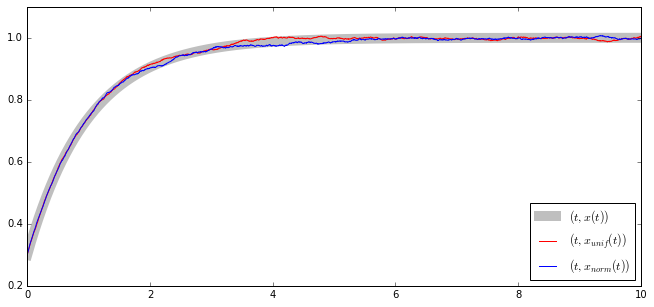

In [41]:
gr.figure(figsize=(11,5))
gr.plot(p["sampTimes"],o0[0],'k', alpha=0.25, lw=10.0, label=r"$(t,x(t))$")
gr.plot(p["sampTimes"],oUnif[0],'r', alpha=1.0, lw=1.0, label=r"$(t,x_{unif}(t))$")
gr.plot(p["sampTimes"],oNorm[0],'b', lw=1.0, label=r"$(t,x_{norm}(t))$")
gr.legend(loc="lower right")
gr.ion(); gr.draw()

Desde arriba ...

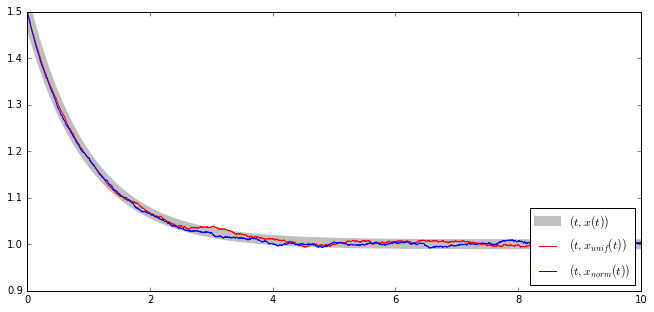

In [42]:
p["x0"]=1.5
p["f"] = lambda t: 0.0
o0= odeint(func=linearForcedEq, y0=p["x0"],t=p["sampTimes"], args=(p,)).transpose()
uUnif= -0.5 + sc.rand(len(p["sampTimes"]))
p["f"] = lambda t: sc.interp(t, xp=p["sampTimes"], fp=uUnif)
oUnif= odeint(func=linearForcedEq, y0=p["x0"],t=p["sampTimes"], args=(p,)).transpose()
uNorm= 0.3*sc.randn(len(p["sampTimes"]))
p["f"] = lambda t: sc.interp(t, xp=p["sampTimes"], fp=uNorm)
oNorm= odeint(func=linearForcedEq, y0=p["x0"],t=p["sampTimes"], args=(p,)).transpose()
#
gr.figure(figsize=(11,5))
gr.plot(p["sampTimes"],o0[0],'k', alpha=0.25, lw=10.0, label=r"$(t,x(t))$")
gr.plot(p["sampTimes"],oUnif[0],'r', alpha=1.0, lw=1.0, label=r"$(t,x_{unif}(t))$")
gr.plot(p["sampTimes"],oNorm[0],'b', lw=1.0, label=r"$(t,x_{norm}(t))$")
gr.legend(loc="lower right")
gr.ion(); gr.draw()